In [1]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path2 = 's3://velocity-u.zarr'
data_path3 = 's3://velocity-v.zarr'

remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

du = xr.open_zarr(store=store2, consolidated=True)
dv = xr.open_zarr(store=store3, consolidated=True)

In [3]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800)).rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800)).rename({'depthv' : 'depth'})

In [4]:
x = 836
y = 440
d = 15
t = 50
u = np.array(du.vozocrtx.isel(x=x,y=y,depthu=d,time_counter=t).values)
v = np.array(dv.vomecrty.isel(x=x,y=y,depthv=d,time_counter=t).values)

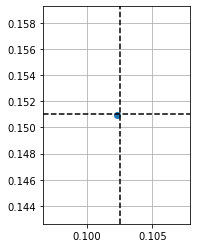

In [26]:
fig, ax = plt.subplots()
ax.scatter(u,v)
ax.set_aspect('equal')
ax.grid('on')
ax.axvline(0.1025, color='k', linestyle = '--')
ax.axhline(0.151, color='k', linestyle = '--')

In [14]:
vec = np.array([2,4])
print(vec[0],vec[1])

velp = (u*vec[0] + v*vec[1])/np.sqrt(vec[0]**2+vec[1]**2)
velo = (- u*vec[1] + v*vec[0])/np.sqrt(vec[0]**2+vec[1]**2) #rotere vector [x,y] 90 grader m/klokka = [x,-y]

2 4


(-0.2, 0.2)

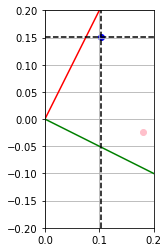

In [39]:
fig, ax = plt.subplots()
ax.scatter(velp,velo,color='pink')
ax.scatter(u,v,color='b')
ax.set_aspect('equal')
ax.grid('on')
ax.plot([0,vec[0]],[0,vec[1]],'r')
ax.plot([0,-vec[0]],[0,-vec[1]],'r')
ax.plot([0,-vec[1]],[0,vec[0]],'g')
ax.plot([0,vec[1]],[0,-vec[0]],'g')
ax.axvline(0.1025, color='k', linestyle = '--')
ax.axhline(0.151, color='k', linestyle = '--')
ax.set_xlim(0,0.2)
ax.set_ylim(-0.2,0.2)

In [35]:
v_r = np.array(vel_r.vpar.values)
v_o = np.array(vel_r.vort.values)

(-0.02, 0.02)

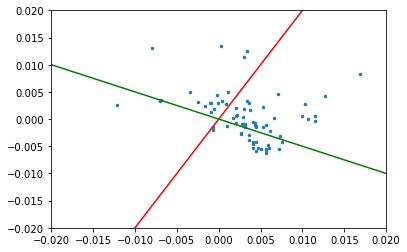

In [36]:
fig, ax = plt.subplots()
ax.scatter(v_r,v_o,s=6)
ax.plot([0,vec[0]],[0,vec[1]],'r')
ax.plot([0,-vec[0]],[0,-vec[1]],'r')
ax.plot([0,-vec[1]],[0,vec[0]],'g')
ax.plot([0,vec[1]],[0,-vec[0]],'g')
ax.set_xlim(-0.02,0.02)
ax.set_ylim(-0.02,0.02)

In [38]:
#a = np.array([2,4])
#b = np.array([-4,2])
a = np.array([vec[0],vec[1]])
b = np.array([-vec[1],vec[0]])
print(a,b)
d = np.dot(a,b)
print(d) # d=0 --> disse skal være orthogonale 

[2 4] [-4  2]
0


In [23]:
# teste amplitude : 
af = u**2 + v**2
ae = velp**2 + velo**2
print(af)
print(ae)

0.033244369328891354
0.033244369328891354
